###Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Read the Data from the given CSV file.

In [2]:
twitter_data = pd.read_csv('Twitter_Data.csv')
twitter_data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


###Missing value analysis

In [3]:
# Check for missing values
twitter_data.isna().mean()

clean_text    0.000025
category      0.000043
dtype: float64

In [4]:
# Drop missing values
twitter_data.dropna(inplace=True)

In [5]:
# Check there there are no missing values
twitter_data.isna().mean()

clean_text    0.0
category      0.0
dtype: float64

In [6]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


There are 162969 twitter reviews.

###Change our dependent variable to categorical. ( 0 to “Neutral,” -1 to “Negative”, 1 to “Positive”)

In [7]:
twitter_data['category'] = np.where(twitter_data['category']==-1, 'Negative',
                                     np.where(twitter_data['category']==1,'Positive',
                                              'Neutral'))

###Check distribution of category labels

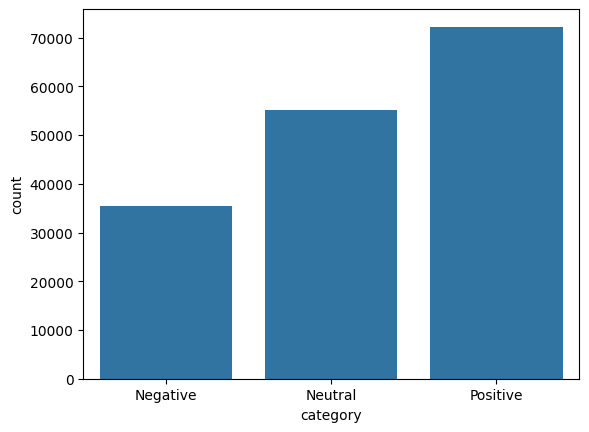

In [8]:
sns.countplot(data=twitter_data, x='category')
plt.show()

###Creating a sample data set for testing text-pre-processing

In [9]:
twitter_sample = twitter_data.sample(n=100, random_state=42)
twitter_sample

,clean_text,category
42229,news flash modi address the nation cancels tri...,Neutral
22035,according congress ecosystem bjp divided house...,Positive
79982,friends did not have the guts let drdo test mo...,Negative
118493,did modi violate the model code conduct speaki...,Negative
12815,raoul gandhy asked modi about nirav for years ...,Neutral
...,...,...
8564,twin feathers modi government’ cap fastest eco...,Positive
49980,thought iaf special aircraft bringing back vij...,Positive
56611,modi regime actually gives ahead after upa sto...,Neutral
69983,very inferior jealous and envious family modi ...,Positive


##Processing Tweets

1. Tweet pre-processor: Eliminate symbols like #, @, urls

In [10]:
!pip install tweet-preprocessor

In [11]:
import preprocessor as p

twitter_sample['clean_text'] = twitter_sample['clean_text'].apply(lambda x: p.clean(x))
twitter_sample['clean_text']

42229     news flash modi address the nation cancels tri...
22035     according congress ecosystem bjp divided house...
79982     friends did not have the guts let drdo test mo...
118493    did modi violate the model code conduct speaki...
12815     raoul gandhy asked modi about nirav for years ...
                                ...                        
8564      twin feathers modi government cap fastest econ...
49980     thought iaf special aircraft bringing back vij...
56611     modi regime actually gives ahead after upa sto...
69983     very inferior jealous and envious family modi ...
32755     sure what what does matter urdu hodgepodge lan...
Name: clean_text, Length: 100, dtype: object

2. Contractions: expand shortened words

In [12]:
!pip install contractions

In [13]:
import contractions

def expand_contractions(text):
  text = contractions.fix(text)
  return text

twitter_sample['clean_text'] = twitter_sample['clean_text'].apply(expand_contractions)
twitter_sample['clean_text']

42229     news flash modi address the nation cancels tri...
22035     according congress ecosystem bjp divided house...
79982     friends did not have the guts let drdo test mo...
118493    did modi violate the model code conduct speaki...
12815     raoul gandhy asked modi about nirav for years ...
                                ...                        
8564      twin feathers modi government cap fastest econ...
49980     thought iaf special aircraft bringing back vij...
56611     modi regime actually gives ahead after upa sto...
69983     very inferior jealous and envious family modi ...
32755     sure what what does matter urdu hodgepodge lan...
Name: clean_text, Length: 100, dtype: object

3. Lemmatization

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


4. All other pre-processing

In [15]:
def my_text_preprocessor(text):
  # convert to lower-case
  lower = text.lower()

  # split sentences into tokens
  tokens = word_tokenize(lower)

  # remove tokens of size <= 2
  tokens = [ token for token in tokens if len(token)>2 ]

  # lemmatization
  tokens = [ lemmatizer.lemmatize(token) for token in tokens  ]

  # remove stopwords
  tokens = [ token for token in tokens if token not in set(stopwords.words('english')) ]

  # remove numbers
  tokens = [ token for token in tokens if not any(char.isdigit()   for char in token) ]

  return tokens

In [16]:
# Apply the pre-processor on sample data

twitter_sample['clean_text'] = twitter_sample['clean_text'].apply(my_text_preprocessor)

In [17]:
twitter_sample['clean_text']

42229     [news, flash, modi, address, nation, cancel, t...
22035     [according, congress, ecosystem, bjp, divided,...
79982     [friend, gut, let, drdo, test, modi, please, e...
118493    [modi, violate, model, code, conduct, speaking...
12815     [raoul, gandhy, asked, modi, nirav, year, neve...
                                ...                        
8564      [twin, feather, modi, government, cap, fastest...
49980     [thought, iaf, special, aircraft, bringing, ba...
56611     [modi, regime, actually, give, ahead, upa, sto...
69983     [inferior, jealous, envious, family, modi, ha,...
32755     [sure, doe, matter, urdu, hodgepodge, language...
Name: clean_text, Length: 100, dtype: object

In [18]:
# Remove commas
twitter_sample['clean_text'] = twitter_sample['clean_text'].apply(lambda x: ' '.join(x))
twitter_sample

,clean_text,category
42229,news flash modi address nation cancel trip atm,Neutral
22035,according congress ecosystem bjp divided house...,Positive
79982,friend gut let drdo test modi please explain p...,Negative
118493,modi violate model code conduct speaking armed...,Negative
12815,raoul gandhy asked modi nirav year never asked...,Neutral
...,...,...
8564,twin feather modi government cap fastest econo...,Positive
49980,thought iaf special aircraft bringing back vij...,Positive
56611,modi regime actually give ahead upa stop devel...,Neutral
69983,inferior jealous envious family modi ha dwarfe...,Positive


###Now that we have tested the pre-processing steps on sample data, let's pre-process the entire dataset.

In [19]:
# tweet-preprocessing
twitter_data['clean_text'] = twitter_data['clean_text'].apply(lambda x: p.clean(x))
# expand contractions
twitter_data['clean_text'] = twitter_data['clean_text'].apply(expand_contractions)
# other text pre-processing
twitter_data['clean_text'] = twitter_data['clean_text'].apply(my_text_preprocessor)
# remove commas
twitter_data['clean_text'] = twitter_data['clean_text'].apply(lambda x: ' '.join(x))

###Split data into dependent(X) and independent(y) dataframe

In [20]:
X = twitter_data['clean_text']
y = twitter_data['category']

###Initialize a Tokenizer
The tokenizer will convert words into sequence of numbers

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
# Define variables

vocab_size = 5000
embedding_dim = 64 # embeddings are represented in higher dimensons so every word is rep as a vector with 64 [...]
max_length = 200
padding_type = 'pre' #question size = 50, pad end with zeros
trunc_type = 'pre'
oov_tok = '<OOV>' # out of vocab words - how to handle them

In [23]:
# Instantiate tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
# Fit - tokenizer learns the words and generates indexes for each word
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index

In [24]:
# every word is given an index
list(word_index.items())[0:10]

[('<OOV>', 1),
 ('modi', 2),
 ('india', 3),
 ('ha', 4),
 ('wa', 5),
 ('people', 6),
 ('bjp', 7),
 ('like', 8),
 ('congress', 9),
 ('election', 10)]

In [25]:
# Replace each word with it's index to get number representation of a sentence
X_seq = tokenizer.texts_to_sequences(X)
print(X_seq[10])

[72, 8, 738, 558, 37, 880, 1, 2181, 927, 34, 1978, 583, 518, 1, 17, 38, 30, 18, 927, 8, 2157, 122, 2]


###Padding the sequence
We pad with zero's to ensure all reviews have the same input length

In [27]:
# Add padding (zero's) from front side
X_padded = pad_sequences(X_seq, maxlen = max_length, padding = padding_type, truncating = trunc_type)

print('Sequnce:')
print(X_seq[10])
print('\n')
print('Padded Sequnce:')
print(X_padded[10])

Sequnce:
[72, 8, 738, 558, 37, 880, 1, 2181, 927, 34, 1978, 583, 518, 1, 17, 38, 30, 18, 927, 8, 2157, 122, 2]


Padded Sequnce:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    

### Use get dummies to convert target categories into numbers

In [31]:
y = pd.get_dummies(y).astype(int)

###Create train, validation and test datasets

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print('Shape of train dataset features: ', X_train.shape)
print('Shape of test dataset features: ', X_test.shape)
print('Shape of validation dataset features: ', X_val.shape)
print('Shape of train dataset target: ', y_train.shape)
print('Shape of test dataset target: ', y_test.shape)
print('Shape of validation dataset target: ', y_val.shape)


Shape of train dataset features:  (97781, 200)
Shape of test dataset features:  (32594, 200)
Shape of validation dataset features:  (32594, 200)
Shape of train dataset target:  (97781, 3)
Shape of test dataset target:  (32594, 3)
Shape of validation dataset target:  (32594, 3)


In [33]:
X_train

array([[   0,    0,    0, ...,    2,  415,  837],
       [   0,    0,    0, ...,    0,   38,    2],
       [   0,    0,    0, ..., 3407,   58,    1],
       ...,
       [   0,    0,    0, ..., 1895,  180,  807],
       [   0,    0,    0, ..., 1348,  315,  194],
       [   0,    0,    0, ...,    0,    1,  144]], dtype=int32)

In [34]:
y_train.head()

,Negative,Neutral,Positive
47765,0,1,0
20509,0,1,0
29272,1,0,0
119262,0,1,0
69409,0,0,1


##Build the LSTM model

In [35]:
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential

In [36]:
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length = max_length),
    Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2, padding='same'),
    Bidirectional(LSTM(embedding_dim)),
    Dense(embedding_dim, activation='relu'),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           320000    
                                                                 
 conv1d (Conv1D)             (None, 200, 32)           6176      
                                                                 
 max_pooling1d (MaxPooling1  (None, 100, 32)           0         
 D)                                                              
                                                                 
 bidirectional (Bidirection  (None, 128)               49664     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0

###Compile the model

In [37]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

##Train the model

In [38]:
history = model.fit(X_train, y_train,
          epochs = 2,
          validation_data = (X_val, y_val),
          verbose = 2)

Epoch 1/2
3056/3056 - 334s - loss: 0.4682 - accuracy: 0.8359 - val_loss: 0.3525 - val_accuracy: 0.8896 - 334s/epoch - 109ms/step
Epoch 2/2
3056/3056 - 328s - loss: 0.3401 - accuracy: 0.8940 - val_loss: 0.3440 - val_accuracy: 0.8901 - 328s/epoch - 107ms/step


### Plot model accuracy and loss for train vs. validation data

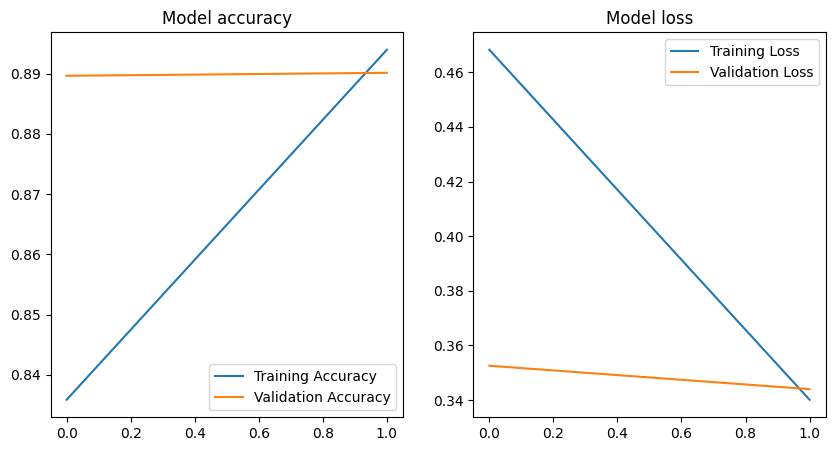

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label = 'Validation Accuracy')
plt.title('Model accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.title('Model loss')
plt.legend()


plt.show()



###Evaluate the model on the test set

In [40]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Accuracy: {:.4f}'.format(accuracy))

1019/1019 [==============================] - 27s 27ms/step - loss: 0.3536 - accuracy: 0.8884
Accuracy: 0.8884


We achieve an accuracy of 88% on test data.

### Make predictions on test dataset

In [41]:
y_test_pred = model.predict(X_test)

1019/1019 [==============================] - 29s 27ms/step


In [42]:
y_test_pred

array([[0.06261431, 0.83974797, 0.09763773],
       [0.10020842, 0.00826377, 0.8915278 ],
       [0.85312146, 0.01531927, 0.13155925],
       ...,
       [0.00560208, 0.97272456, 0.02167339],
       [0.0732028 , 0.01395423, 0.912843  ],
       [0.04337488, 0.02613666, 0.9304884 ]], dtype=float32)

###Performance metrics

1. Confusion Matrix

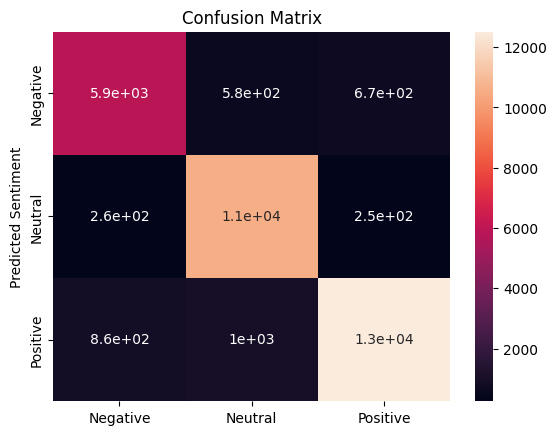

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(np.argmax(np.array(y_test), axis=1), np.argmax(y_test_pred, axis=1))

sentiments=['Negative',	'Neutral','Positive']

sns.heatmap(cm, annot=True,
            xticklabels = sentiments,
            yticklabels = sentiments)
plt.xlabel = 'Actual Sentiment'
plt.ylabel('Predicted Sentiment')
plt.title('Confusion Matrix')
plt.show()

2. Classification Report

In [44]:
cr = classification_report(np.argmax(np.array(y_test), axis=1), np.argmax(y_test_pred, axis=1), output_dict=True)

pd.DataFrame(cr).T

,precision,recall,f1-score,support
0,0.840148,0.824525,0.832263,7152.000000
1,0.869028,0.953285,0.909208,11067.000000
2,0.931224,0.870330,0.899748,14375.000000
accuracy,0.888446,0.888446,0.888446,0.888446
macro avg,0.880134,0.882713,0.880407,32594.000000
weighted avg,0.890122,0.888446,0.888152,32594.000000


##Test the sentiment analysis by passing sample text

In [49]:
# Define a funtion that will pre-process input text and generate the sentiment

def predict_sentiment(text):
  sentiment = ['Negative', 'Neutral', 'Positive']
  maxlen=50

  # Trasnform text into sequence of integers using tokenizer
  test_token = tokenizer.texts_to_sequences(test)
  # Pad sequences to the same length
  test_padded = pad_sequences(test_token, padding='pre', maxlen = maxlen)
  # Predict the sentiment
  test_pred = model.predict(test_padded).argmax(axis=1)

  # Print
  print('Sentiment is : ', sentiment[test_pred[0]])


In [50]:
test = ['I hate when I have to call and wake people up']

predict_sentiment(test)

1/1 [==============================] - 1s 1s/step
Sentiment is :  Negative


In [51]:
test = ['I had a good time at the movies today, though it was a bit crowded.']

predict_sentiment(test)

1/1 [==============================] - 0s 40ms/step
Sentiment is :  Positive


In [52]:
test = ['The food at the mall was okayish']

predict_sentiment(test)

1/1 [==============================] - 0s 23ms/step
Sentiment is :  Neutral
